In [16]:
import pandas as pd
import numpy as np
import collections

df = pd.read_csv('./USD-KRW_forex_rate_2021.csv')

In [17]:
# Analyze 2021 USD-KRW MAR

# Extract MAR column data
MAR = df.get('MARKET AVERAGE RATE')

# Display MAR frequency list
MAR_count = collections.Counter(MAR)
print('MAR Frequency:', MAR_count)

MAR Frequency: Counter({1117: 12, 1118: 7, 1131: 7, 1133: 6, 1187: 6, 1179: 6, 1124: 5, 1111: 5, 1121: 5, 1128: 5, 1185: 5, 1181: 5, 1132: 4, 1113: 4, 1146: 4, 1175: 4, 1172: 4, 1168: 4, 1178: 4, 1182: 4, 1184: 4, 1191: 4, 1186: 4, 1102: 3, 1104: 3, 1106: 3, 1137: 3, 1130: 3, 1136: 3, 1134: 3, 1129: 3, 1120: 3, 1115: 3, 1147: 3, 1145: 3, 1150: 3, 1152: 3, 1177: 3, 1170: 3, 1176: 3, 1190: 3, 1087: 2, 1098: 2, 1103: 2, 1114: 2, 1116: 2, 1107: 2, 1109: 2, 1110: 2, 1122: 2, 1126: 2, 1143: 2, 1119: 2, 1125: 2, 1153: 2, 1162: 2, 1169: 2, 1180: 2, 1171: 2, 1166: 2, 1158: 2, 1183: 2, 1189: 2, 1192: 2, 1188: 2, 1082: 1, 1088: 1, 1090: 1, 1097: 1, 1095: 1, 1096: 1, 1100: 1, 1127: 1, 1139: 1, 1112: 1, 1135: 1, 1108: 1, 1138: 1, 1144: 1, 1140: 1, 1142: 1, 1151: 1, 1149: 1, 1155: 1, 1167: 1, 1159: 1, 1160: 1, 1157: 1, 1174: 1, 1173: 1, 1195: 1, 1200: 1, 1194: 1, 1164: 1})


In [18]:
# Display maximum and minimum MAR
print('Highest MAR:' , max(MAR))
print('Lowest MAR:' , min(MAR))

# Display median and average MAR
print('Average MAR: ', np.mean(MAR))
print('Median MAR:', np.median(MAR))

Highest MAR: 1200
Lowest MAR: 1082
Average MAR:  1144.859437751004
Median MAR: 1137.0


In [19]:
# Display MAR variance and standard deviation
print('MAR variance: ', np.var(MAR), 1)
print('MAR standard deviation: ', np.std(MAR), 1)

MAR variance:  912.3055434589763 1
MAR standard deviation:  30.20439609492261 1


In [20]:
# Correlation analysis using Pearson correlation coefficient
# Compare USD-KRW MAR with EUR-KRW MAR
EUR_MAR_list = df.get('EUR-KRW MARKET AVERAGE RATE').tolist()
USD_MAR_list = MAR.tolist()
corr_list = [EUR_MAR_list, USD_MAR_list]
df_corr = pd.DataFrame(corr_list).T
corr = df_corr.corr(method = 'pearson')
print('Correlation: ')
print(corr)

Correlation: 
          0         1
0  1.000000  0.397348
1  0.397348  1.000000


=== Linear Regression Analysis of EUR-KRW MAR and USD-KRW MAR ===
Slope: 0.771519157984041
Intercept: 100.7506011550172
Correlation coefficient: 0.39734803905416344
P-value:  7.593911137609365e-11
Standard deviation: 0.11337381112318488


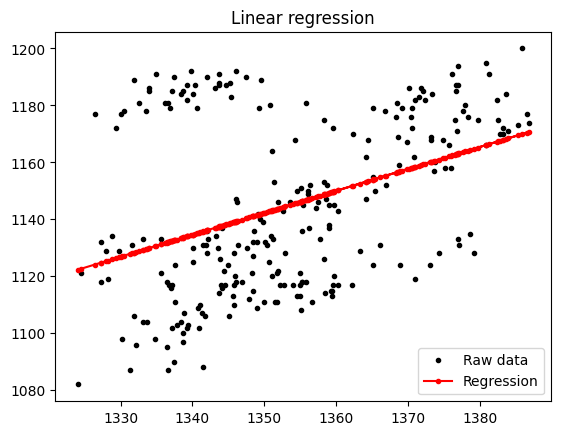

Presumed EUR-KRW MAR:  1430
Expected USD-KRW MAR:  1204.022997072196


In [21]:
# Linear regression analysis 
# scipy.polyval is deprecated and will be removed in SciPy 2.0.0, use numpy.polyval instead
from scipy import stats, polyval
from numpy import polyval
from pylab import plot, title, show, legend
x = EUR_MAR_list
y = USD_MAR_list

slope, intercept, r, p, std = stats.linregress(x, y)
ry = polyval([slope, intercept], x)
print('=== Linear Regression Analysis of EUR-KRW MAR and USD-KRW MAR ===')
print('Slope:', slope)
print('Intercept:', intercept)
print('Correlation coefficient:', r)
print('P-value: ', p)
print('Standard deviation:', std)

# Step 1. What USD-KRW MAR would be when EUR-KRW MAR is <value>? 
presumed_EUR_KRW = 1430

# Step 2. Define linear regression formula
LR_formula = presumed_EUR_KRW * slope + intercept

# Step 3. 
plot(x, y, 'k.')
plot(x, ry, 'r.-')
title('Linear regression')
legend(['Raw data', 'Regression'])
show()

print('Presumed EUR-KRW MAR: ', presumed_EUR_KRW)

print('Expected USD-KRW MAR: ', LR_formula)
